# Ejercicio 1

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import glob
import os

plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('seaborn')

In [4]:
dir_actual = os.getcwd()
archivos_dump = list(map(lambda x: f'{dir_actual}/{x}', glob.glob('input/dump/*.csv')))

dfs = (pd.read_csv(f) for f in archivos_dump)
df = pd.concat(dfs).drop(columns='Unnamed: 0')
df.columns = ['artist', 'genre', 'song_name', 'lyrics']

# Ejercicio 2

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=5000)
vectorizer_fit = vectorizer.fit_transform(df['lyrics'])

words = vectorizer.get_feature_names_out()
freqs = vectorizer_fit.toarray().sum(axis=0)

palabras_frecuentes = pd.DataFrame(freqs, index=words, columns=['Frecuencia'])
palabras_frecuentes = palabras_frecuentes.sort_values(by='Frecuencia', ascending=False)

print(f'Las 5000 palabras mas frecuentes en la base de datos son: {palabras_frecuentes}')

Las 5000 palabras mas frecuentes en la base de datos son:             Frecuencia
like             19629
don              17398
know             14962
got              14171
just             13978
...                ...
ra                  31
mattress            31
shakes              31
martyr              31
footprints          31

[5000 rows x 1 columns]


# Ejercicio 3

In [20]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

In [21]:
n_components = [5, 10, 15]
learning_decay = [0.7, 0.5]

grid = {
    'n_components': n_components,
    'learning_decay': learning_decay
}

modelo_grilla = GridSearchCV(LatentDirichletAllocation(learning_method='online'), 
                             param_grid=grid, verbose=5, cv=5)

In [22]:
X = CountVectorizer(stop_words='english', max_features=5000, max_df=0.1).fit_transform(df['lyrics'])

In [17]:
modelo_grilla.fit(X)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END learning_decay=0.7, n_components=5;, score=-1163788.469 total time=  35.0s
[CV 2/5] END learning_decay=0.7, n_components=5;, score=-1473371.251 total time=  33.3s
[CV 3/5] END learning_decay=0.7, n_components=5;, score=-1321940.552 total time=  34.2s
[CV 4/5] END learning_decay=0.7, n_components=5;, score=-1171146.482 total time=  32.0s
[CV 5/5] END learning_decay=0.7, n_components=5;, score=-1475996.457 total time=  30.5s
[CV 1/5] END learning_decay=0.7, n_components=10;, score=-1180431.711 total time=  35.4s
[CV 2/5] END learning_decay=0.7, n_components=10;, score=-1488246.542 total time=  35.0s
[CV 3/5] END learning_decay=0.7, n_components=10;, score=-1341744.658 total time=  34.5s
[CV 4/5] END learning_decay=0.7, n_components=10;, score=-1192856.468 total time=  34.9s
[CV 5/5] END learning_decay=0.7, n_components=10;, score=-1493181.077 total time=  32.2s
[CV 1/5] END learning_decay=0.7, n_components=15;, scor

GridSearchCV(cv=5,
             estimator=LatentDirichletAllocation(learning_method='online'),
             param_grid={'learning_decay': [0.7, 0.5],
                         'n_components': [5, 10, 15]},
             verbose=5)

In [19]:
modelo_grilla.best_params_

{'learning_decay': 0.7, 'n_components': 5}

Los mejores parametros para el modelo son:
- learning_decay: 0.7
- n_components: 5

# Ejercicio 4

In [24]:
mejor_learning_decay = 0.7
mejor_n_components = 5
best_lda = LatentDirichletAllocation(n_components=mejor_n_components, 
                                     learning_decay=mejor_learning_decay,
                                     learning_method='online')
best_lda.fit(X) 

LatentDirichletAllocation(learning_method='online', n_components=5)

In [10]:
for topic_id, topic_name in enumerate(best_lda.components_):
# para cada tópico
    print("tópico: {}".format(topic_id + 1))
    print(" ".join([vectorizer.get_feature_names_out()[i] for i in
    topic_name.argsort()[:-15 - 1: -1]]))

tópico: 1
ladies tony dang example nah hail yesterday round global warmth alot dope christine hol harm
tópico: 2
bein pages losing sunrise familiar dressed fresh forsake helped slang trust star ll figures drill
tópico: 3
rock roll fuse whores bridgette tool beans stretch west kissing toxic damn gin goodness bionic
tópico: 4
ones ah umm workout lyrics creation tan dies daisy bought humanity empire mall dancer dreams
tópico: 5
niggas niggaz rap funk wiz sooner bird garbage killed cheat worked vibrations goons killin chopped


- El primer topico pareciera corresponder a unos cuantos toques de hip-hop (por las palabras: ladies,
tony, dang, nah, yesterday, alot, dope, hol y harm) con pop (hail, round, global, warmth). Por lo
tanto, podria corresponder a un genero de pop con grandes influencias de hip hop.

- El segundo topico pareciera corresponder a algo de rap (por las palabras: bein, pages, losing,
sunrise, familiar, dressed, fresh, slang) con pop (familiar, dressed, helped, trust, star, figures).
Por lo tanto, podria ser hip hop con algo de pop.

- El tercer topico pareciera corresponder mas al genero de rock (por las palabras: rock, roll, fuse,
whores, bridgette, west, kissing, toxic, damn), con un poquito de country (bridgette, tool, beans)
y pop (bionic, goodness). Por lo tanto podria corresponder a un genero rock-country-pop.

- El cuarto topico pareciera corresponder a un poco de pop (ones, ah, umm, workout, daisy, mall,
dancer, dreams) con metal (creation, dies, humanity, empire). Por lo tanto, es un genero metal-pop,
o metal con un poco de letras mas cotidianas.

- El quinto topico pareciera ser en su gran mayoria rap (por las palabras: n****s/z, rap, funk, wiz,
garbage, killed, cheat, goons, killin y chopped). Por lo tanto, es un genero de rap mas puro.

Como resumen:

- 1er topico: Pop influenciado por hip hop
- 2do topico: Hip hop con pequenas influencias de pop
- 3er topico: Rock Country Pop
- 4to topico: Metal Pop
- 5to topico: Rap

# Ejercicio 5

In [31]:
fit_best_lda = best_lda.transform(X)
topics_for_each_doc = pd.DataFrame(
    np.round(fit_best_lda, 3),
    index=df['lyrics']
)

topics_for_each_doc.columns = list(map(lambda x: "T: {}".format(x),
                                       range(1, best_lda.n_components + 1)))

concatenated_df = pd.concat(
    [df.reset_index(drop=True), topics_for_each_doc.reset_index(drop=True)], axis=1)
concatenated_df['highest_topic'] = np.argmax(topics_for_each_doc.values,
                                             axis=1) + 1


<AxesSubplot:>

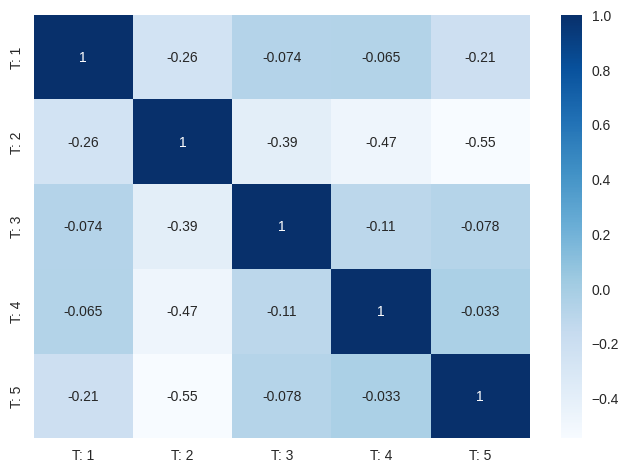

In [38]:
probs_topicos = concatenated_df.loc[:, 'T: 1':'T: 5']
sns.heatmap(probs_topicos.corr(), annot=True, cmap='Blues')

- De forma general, se puede ver que todos los topicos tienen una correlacion negativa con otros topicos. Esto estaria dando cuenta que mientras aumenta la probabilidad de aparicion de un topico, la aparicion de otro disminuye. Lo 
anterior indica que los topicos son moderadamente excluyentes entre si. Por lo tanto, se cumple la
finalidad del algoritmo de Esperanza Maxima (generar grupos separados entre si).

- Ademas, hay ciertos grupos que son mucho mas excluyentes entre si que otros. Esto, ya que presentan
un valor de correlacion absoluto mucho mayor (valor absoluto > 0.1). Ejemplos de lo anterior son:

    - T: 1 con T: 2 y T: 5
    - T: 2 con T: 3, T: 4, T: 5
    - T: 3 con T: 4 y

Esto estaria indicando que aquellos grupos presentan una menor cantidad de topicos similares.

## Probabilidades para un artista especifico

En este caso, se puede hacer un groupby de la columna de artistas, y calcular la probabilidad media
para cada uno de los topicos.

In [61]:
probs_per_artist = concatenated_df.groupby('artist')[['T: 1', 'T: 2', 'T: 3', 'T: 4', 'T: 5']]
probs_per_artist = probs_per_artist.mean().reset_index()
probs_per_artist

,artist,T: 1,T: 2,T: 3,T: 4,T: 5
0,A Tribe Called Quest,0.053535,0.095228,0.155719,0.180026,0.515500
1,Anthrax,0.056471,0.588941,0.157176,0.091159,0.106188
2,Black Star,0.032261,0.154435,0.081609,0.149957,0.581826
3,Bob Dylan,0.110378,0.473707,0.229600,0.147933,0.038360
4,Britney Spears,0.150594,0.366019,0.168808,0.278455,0.036146
...,...,...,...,...,...,...
56,The Smashing Pumpkins,0.098287,0.681976,0.111602,0.076630,0.031492
57,The Smiths,0.134844,0.517532,0.203429,0.084844,0.059506
58,Tool,0.049016,0.650855,0.113403,0.086887,0.099871
59,Vital Remains,0.005400,0.928378,0.022000,0.020178,0.023889


# Probabilidades para Dua Lipa

In [66]:
dua_lipa_probs_totales = concatenated_df.query('artist == "Dua Lipa"')
display(dua_lipa_probs_totales)

dua_lipa_probs_resumidas = probs_per_artist.query('artist == "Dua Lipa"')
display(dua_lipa_probs_resumidas)

,artist,genre,song_name,lyrics,T: 1,T: 2,T: 3,T: 4,T: 5,highest_topic
7792,Dua Lipa,pop,Genesis,In the beginning \n God created heaven and Ear...,0.003,0.654,0.061,0.280,0.003,2
7793,Dua Lipa,pop,Lost In Your Light,Over and over \n Waves of frightening feelings...,0.262,0.686,0.043,0.005,0.005,2
7794,Dua Lipa,pop,Hotter Than Hell,He calls me the devil \n I make him wanna sin ...,0.185,0.721,0.002,0.002,0.089,2
7795,Dua Lipa,pop,Be The One,I see the moon \n I see the moon \n I see the ...,0.289,0.524,0.007,0.173,0.007,2
7796,Dua Lipa,pop,IDGAF,You call me all friendly \n Tellin' me how muc...,0.042,0.224,0.003,0.633,0.098,4
7797,Dua Lipa,pop,Blow Your Mind (Mwah),I know it's hot \n I know we've got \n Somethi...,0.107,0.153,0.736,0.002,0.002,3
7798,Dua Lipa,pop,Garden,Remember when we swam in the ocean? \n Now we ...,0.030,0.964,0.002,0.002,0.002,2
7799,Dua Lipa,pop,No Goodbyes,Maybe one day I can see you \n We can smile an...,0.147,0.173,0.002,0.676,0.002,4
7800,Dua Lipa,pop,Thinking 'Bout You,3 AM and my neighbours hate me \n Music blasti...,0.097,0.459,0.004,0.436,0.004,2
7801,Dua Lipa,pop,New Rules,"(One, one, one) \n Talkin' in my sleep at nigh...",0.002,0.141,0.002,0.735,0.119,4


,artist,T: 1,T: 2,T: 3,T: 4,T: 5
11,Dua Lipa,0.132448,0.472828,0.132103,0.214034,0.048586


<AxesSubplot:>

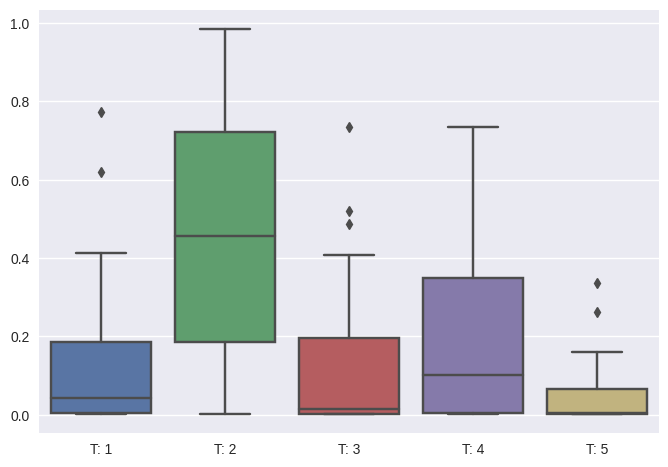

In [58]:
sns.boxplot(data=dua_lipa_probs_totales.drop(columns='highest_topic'))

- Segun la tabla de canciones totales, tabla de artista resumida y graficos de distribucion para 
Dua Lipa, se observa una mayor probabilidad de pertenecer/escribir canciones relacionadas al topico 2. En segundo lugar,
el topico 4 es el que tiene la mayor probabilidad de pertenecer una cancion escrita por Dua Lipa.
Finalmente, una cancion escrita por Dua Lipa tiene una baja probabilidad de pertenecer al grupo
1, 3 o 5.

- Sabiendo que Dua Lipa escribe principalemnte canciones relacionadas al Pop, es esperable
que los grupos 2 y 4 tengan un alto contenido de este genero. Debido a lo anterior, es importante
reconsiderar la definicion de los topicos en los apartados anteriores. 